In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# plt.style.use('dark_background')
# plt.style.use('seaborn-dark')

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.rcParams["figure.figsize"] = (20, 12)

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [26]:
df = pd.read_csv('population-growth-rate-with-and-without-migration.csv')
df

,Entity,Code,Year,"Estimates, 1950 - 2020: Annually interpolated demographic indicators - Population growth rate (percentage)","Estimates, 1950 - 2020: Annually interpolated demographic indicators - Rate of natural increase (per 1,000 population)"
0,Afghanistan,AFG,1950,1.129,1.1823
1,Afghanistan,AFG,1951,1.172,1.2238
2,Afghanistan,AFG,1952,1.257,1.3060
3,Afghanistan,AFG,1953,1.339,1.3867
4,Afghanistan,AFG,1954,1.418,1.4659
...,...,...,...,...,...
17461,Zimbabwe,ZWE,2016,1.504,2.4578
17462,Zimbabwe,ZWE,2017,1.435,2.3688
17463,Zimbabwe,ZWE,2018,1.416,2.2793
17464,Zimbabwe,ZWE,2019,1.448,2.1974


In [27]:
df.columns = ['entity', 'code', 'year', 'migration', 'no_migration']
current = df[df.year == df.year.max()]

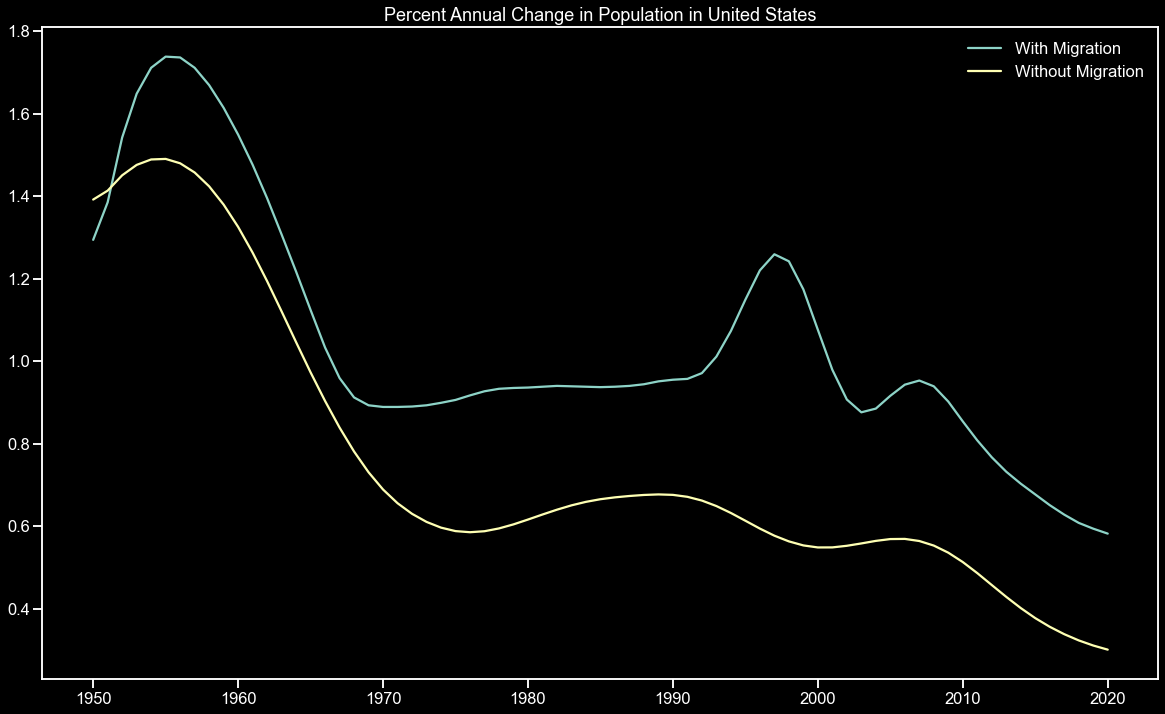

In [28]:
def plot_country(country):
    temp = df[df.entity==country]
    plt.plot(temp.year, temp.migration, label='With Migration')
    plt.plot(temp.year, temp.no_migration, label='Without Migration')
    plt.title('Percent Annual Change in Population in ' + country)
    plt.legend()
plot_country('United States')

In [29]:
current

,entity,code,year,migration,no_migration
70,Afghanistan,AFG,2020,2.304,2.4995
141,Africa,NaN,2020,2.440,2.4740
212,Albania,ALB,2020,-0.139,0.3190
283,Algeria,DZA,2020,1.784,1.8063
354,Angola,AGO,2020,3.207,3.1994
...,...,...,...,...,...
17181,Western Sahara,ESH,2020,2.463,1.4515
17252,World,OWID_WRL,2020,1.036,1.0362
17323,Yemen,YEM,2020,2.228,2.3328
17394,Zambia,ZMB,2020,2.882,2.9227


In [30]:
current['difference'] = current.migration - current.no_migration

<ipython-input-30-9f354fba8178>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current['difference'] = current.migration - current.no_migration


In [31]:
current

,entity,code,year,migration,no_migration,difference
70,Afghanistan,AFG,2020,2.304,2.4995,-0.1955
141,Africa,NaN,2020,2.440,2.4740,-0.0340
212,Albania,ALB,2020,-0.139,0.3190,-0.4580
283,Algeria,DZA,2020,1.784,1.8063,-0.0223
354,Angola,AGO,2020,3.207,3.1994,0.0076
...,...,...,...,...,...,...
17181,Western Sahara,ESH,2020,2.463,1.4515,1.0115
17252,World,OWID_WRL,2020,1.036,1.0362,-0.0002
17323,Yemen,YEM,2020,2.228,2.3328,-0.1048
17394,Zambia,ZMB,2020,2.882,2.9227,-0.0407


In [32]:
current.sort_values(by='difference').tail(20)

,entity,code,year,migration,no_migration,difference
5821,Germany,DEU,2020,0.229,-0.1985,0.4275
7241,Ireland,IRL,2020,1.018,0.5854,0.4326
5466,French Guiana,GUF,2020,2.617,2.1681,0.4489
7880,Kuwait,KWT,2020,1.423,0.9697,0.4533
993,Austria,AUT,2020,0.489,0.0057,0.4833
11856,Norway,NOR,2020,0.800,0.3137,0.4863
15264,Switzerland,CHE,2020,0.717,0.2158,0.5012
922,Australia & New Zealand,NaN,2020,1.093,0.5768,0.5162
10862,Nepal,NPL,2020,1.830,1.2968,0.5332
851,Australia,AUS,2020,1.147,0.5858,0.5612


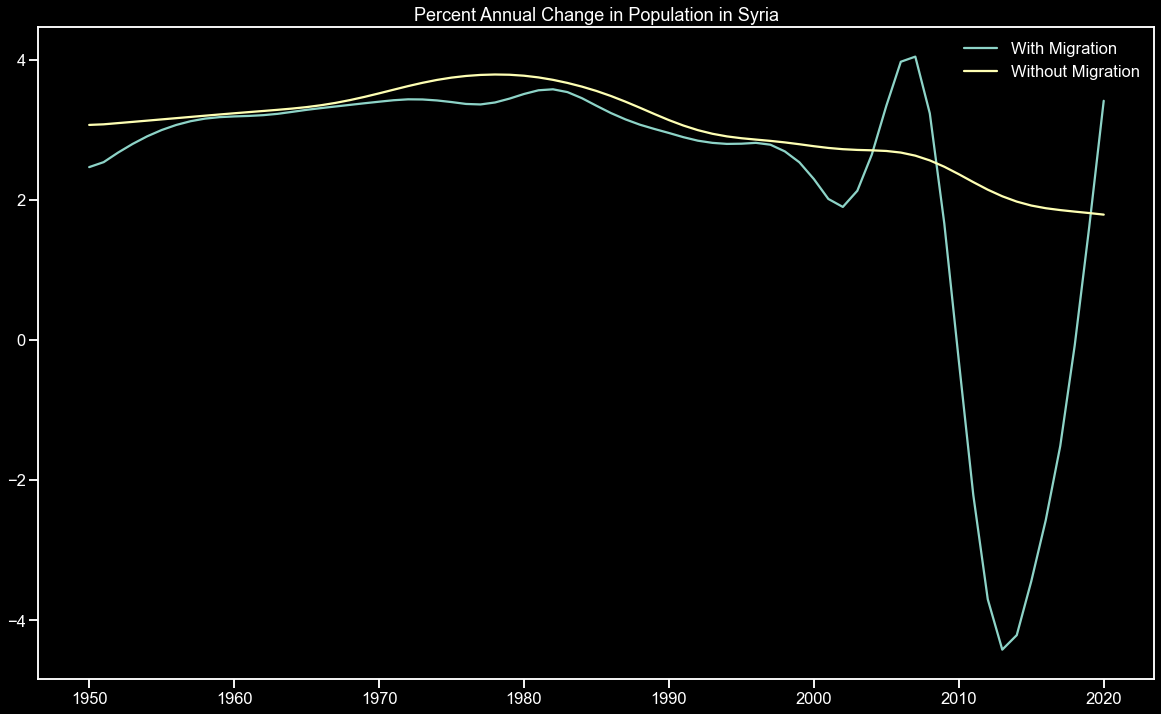

In [33]:
plot_country('Syria')

<AxesSubplot:>

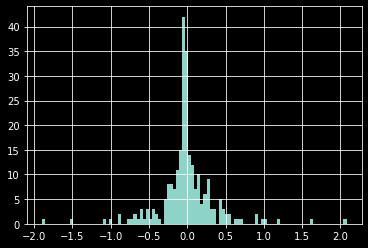

In [10]:
current.difference.hist(bins=100)